In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
#重点在于选择参数
def uniform_dis(x_1=4):
    a=16807
    b=0
    x_1=4
    m=2147483647
    res_lst=[]
    x_n=x_1
    for i in range(12*5000):
        x_n_next=(a*x_n+b)%m
        res=x_n_next/m
        x_n=x_n_next
        res_lst.append(res)
    return res_lst


In [37]:
def cal_mean_var_error(act_mean,act_var,des_mean,des_var):
    print(f"mean : {act_mean}   var : {act_var}")
    try:
        print(f"error_rate {abs(act_mean-des_mean)/des_mean*100} , {abs(act_var-des_var)/des_var*100}")
    except:
        print(f"error_rate {abs(act_mean-des_mean)*100} , {abs(act_var-des_var)/des_var*100}")


In [101]:
uniform_array=uniform_dis()

In [102]:
uniform_array=np.array(uniform_array)
(uniform_array.mean()-0.5)/0.5*100,(uniform_array.var()-1/12)/(1/12)*100

(0.05047773913657849, 0.022756542813157088)

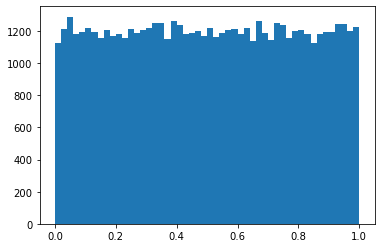

In [103]:
nums=plt.hist(uniform_array,bins=50)
plt.savefig("uniform.png")

In [116]:
filt1=uniform_array<=0.4
uniform_array[filt1].shape[0]/60000


0.4007

## 中心极限定理产生高斯分布

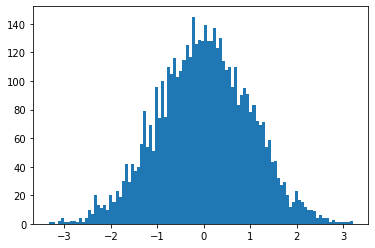

In [32]:
uniform_array=np.array(uniform_array)
array_12=uniform_array.reshape(12,-1)
# 生成12个均匀分布
array_12.shape
array_12.mean(axis=1)
# 限制到范围-0.5 ~ 0.5
array_12-=0.5
array_12.mean(axis=1)
#12 个均匀分布相加
sun_of_12=np.sum(array_12,axis=0)
sun_of_12.shape
sun_of_12.mean()
# 更改方差
plt.hist(sun_of_12,bins=100)
plt.show()

In [38]:
cal_mean_var_error(sun_of_12.mean(),sun_of_12.var(),0,1)

mean : 0.003028664348194688   var : 0.9828248826435654
error_rate inf , 1.7175117356434622


<ipython-input-37-ce54d5949217>:4: RuntimeWarning: divide by zero encountered in double_scalars
  print(f"error_rate {abs(act_mean-des_mean)/des_mean*100} , {abs(act_var-des_var)/des_var*100}")


## box-muller 生成高斯分布

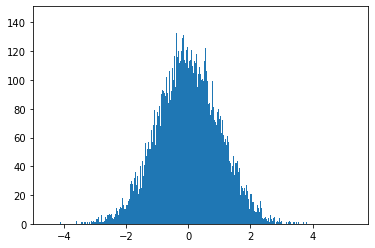

In [27]:
u=uniform_dis()
u=np.array(u)
u=u.reshape(2,-1)
# 将u1做反变换
u1_inverse=np.sqrt(-2*np.log(1-u[0]))
# 生成高斯分布
res_x=u1_inverse*np.cos(2*np.pi*u[1])
plt.hist(res_x,bins=1000)
plt.show()

In [39]:
cal_mean_var_error(res_x.mean(),res_x.var(),0,1)

mean : 0.003740991380011349   var : 1.0093457248115925
error_rate inf , 0.934572481159246


<ipython-input-37-ce54d5949217>:4: RuntimeWarning: divide by zero encountered in double_scalars
  print(f"error_rate {abs(act_mean-des_mean)/des_mean*100} , {abs(act_var-des_var)/des_var*100}")


## parteo分布

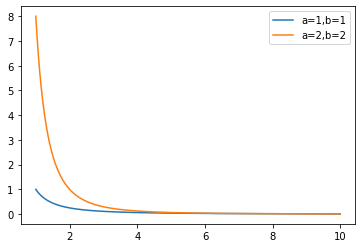

In [92]:
# 产生parteo分布a=1 b=1
x=np.arange(1,10,0.01)
y1=(1/x**2)
# 产生parteo分布a=2 b=2
y2=(8/x**3)
plt.plot(x,y1,label="a=1,b=1")
plt.plot(x,y2,label="a=2,b=2")
plt.legend()

1.0

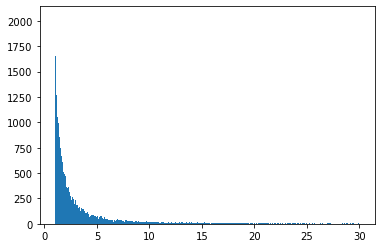

In [84]:
# 产生均匀分布
unif2=uniform_dis()
unif2=np.array(unif2)

# 使用反变换法得到pareto分布
pareto=1/(1-unif2)

# 为了观察更加清晰 限制反函数生成值的范围
temp=np.clip(pareto,0,30)
plt.hist(temp,bins=1000)
plt.show()

In [89]:
filt=temp<=2
temp[filt].shape[0]/60000

0.5004333333333333

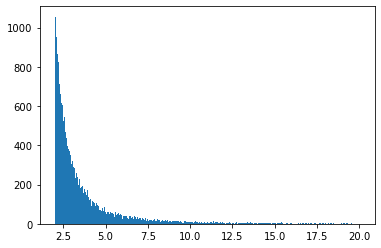

In [62]:
# 产生均匀分布
unif2=uniform_dis()
unif2=np.array(unif2)

# 使用反变换法得到pareto分布
pareto=2/np.sqrt(1-unif2)
# 为了观察更加清晰 限制反函数生成值的范围
temp=np.clip(pareto,0,20)
plt.hist(temp,bins=1000)
plt.show()

In [90]:
filt=temp<=4
temp[filt].shape[0]/60000

0.7503833333333333

## 产生指数分布

In [72]:
# 使用反变换法得到指数分布
exp_dis=np.log(1-unif2)**2
exp_dis.min(),exp_dis.max(),exp_dis.mean()
plt.hist(exp_dis,bins=1000)
plt.show()
temp=np.clip(exp_dis,0,10)
plt.hist(temp,bins=1000)
plt.show()

## 组合法生成混合高斯

In [127]:
# 通过不同的种子生成三个独立的均匀分布
u=uniform_dis(4)
u=np.array(u)
u=u.reshape(2,-1)
# 将u1做反变换
u1_inverse=np.sqrt(-2*np.log(1-u[0]))
# 生成高斯分布
g1=u1_inverse*np.cos(2*np.pi*u[1])


u=uniform_dis(5)
u=np.array(u)
u=u.reshape(2,-1)
# 将u1做反变换
u1_inverse=np.sqrt(-2*np.log(1-u[0]))
# 生成高斯分布
g2=u1_inverse*np.cos(2*np.pi*u[1])

u=uniform_dis(6)
u=np.array(u)
u=u.reshape(2,-1)
# 将u1做反变换
u1_inverse=np.sqrt(-2*np.log(1-u[0]))
# 生成高斯分布
g3=u1_inverse*np.cos(2*np.pi*u[1])


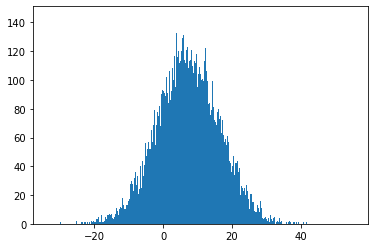

In [128]:
# 产生N(-1,1/16) gaussian distribution p=1/2
guassian1=0.5*4*(g1+1)/0.25
# 产生N(0,1) gaussian distribution p=1/3
guassian2=1/3*(g1)
# 产生N(1,1/4) gaussian distribution p=1/6
guassian3=1/6*2*(res_x-1)/0.5
res=guassian1+guassian2+guassian3
plt.hist(res,bins=1000)
plt.show()

In [129]:
cal_mean_var_error(res.mean(),res.var(),1,1)

mean : 7.367002255753436   var : 81.757003709739
error_rate 636.7002255753436 , 8075.700370973899


## possion过程

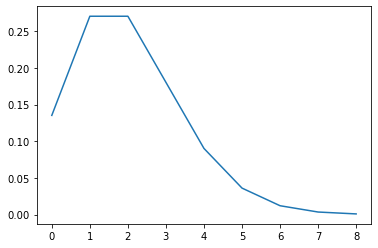

In [140]:
x=np.arange(0,9)
poisson_param_2=[]
for i in range(0,len(x)):
    poisson_param_2.append(np.exp(-2)*np.exp2(i)/np.math.factorial(i))
poisson_param_2=np.array(poisson_param_2)
plt.plot(x,poisson_param_2)

In [132]:
x=uniform_dis()
exp_dist=-0.5*np.log(x)

In [133]:
exp_dist=exp_dist.reshape(1000,-1)

In [134]:
exp_dist[3]

array([0.46053032, 0.10585417, 0.72243156, 0.15962242, 0.24995585,
       0.07483414, 0.16538563, 0.22652406, 3.79808051, 0.40659713,
       0.06105596, 1.86854138, 0.45618054, 0.65421144, 1.87806274,
       0.08185987, 0.10816478, 0.31653919, 0.13898385, 0.6040079 ,
       0.13990745, 0.10608536, 0.02639352, 0.10065458, 0.45183699,
       0.9249121 , 0.94955109, 1.42591412, 0.44126394, 0.21071041,
       0.59067114, 0.34034961, 0.1371167 , 0.04223963, 0.3700618 ,
       0.07391987, 0.79756708, 0.09549437, 0.01684893, 1.28608518,
       0.30428863, 1.1515445 , 0.07932736, 0.67204771, 0.07909399,
       0.02261761, 0.19970455, 0.15859219, 0.11268615, 0.20283088,
       0.38444136, 0.28984254, 0.86922341, 0.29279255, 0.11070394,
       0.02174089, 0.07417581, 0.12161337, 0.66793439, 1.41818761])

In [136]:
def cal_one_possion(lst):
    # 返回在T时间内，独立事件发生的次数
    T=1
    res=0
    times=0
    for i in range(len(lst)):
        res+=lst[i]
        if res<T:
            times+=1
        else:
            break
    return times



In [137]:
res_lst=[]
for i in range(0,1000):
    res_lst.append(cal_one_possion(exp_dist[i]))

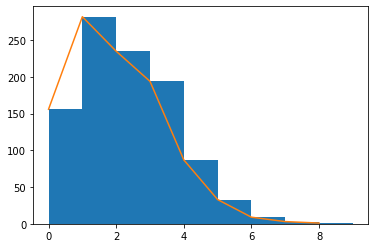

In [138]:
nums=plt.hist(res_lst,bins=np.arange(0,10))[0]
plt.plot(np.arange(0,9),nums)
plt.show()

In [143]:
nums=nums/1000

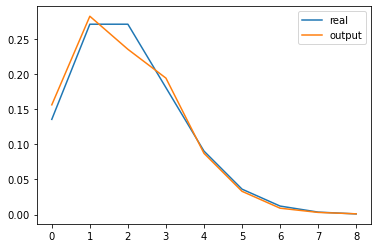

In [144]:
x=np.arange(0,9)
poisson_param_2=[]
for i in range(0,len(x)):
    poisson_param_2.append(np.exp(-2)*np.exp2(i)/np.math.factorial(i))
poisson_param_2=np.array(poisson_param_2)
plt.plot(x,poisson_param_2,label="real")
plt.plot(x,nums,label="output")
plt.legend()

In [156]:
res=0
res_lst=[]
# 设置一段时间内事件最大出现次数为9
times_lst=[0]*10

#times_lst[i] 表示一段时间内某个事件出现次数次数为i的个数

# 进行1000次测量在20单位时间内，一个事件发生的次数 
for i in range(0,10000):
    res=0
    times=0
    while res<1:
        res+=exp_dist[np.random.randint(60000)]
        times+=1
    if times<10:
        times_lst[times]+=1
print(times_lst)

[0, 1312, 2696, 2776, 1791, 887, 368, 119, 41, 9]
